In [5]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

import json
import numpy as np
from color import get_color, get_colors
import matplotlib.pyplot as plt

In [6]:
%load_ext autoreload
%autoreload 2
from retrieve import retrieve_planner_stats_by_run, retrieve_planner_stats_by_steering
from definitions import *
from utils import *
from mpb import MPB, MultipleMPB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Stats by Steer Function

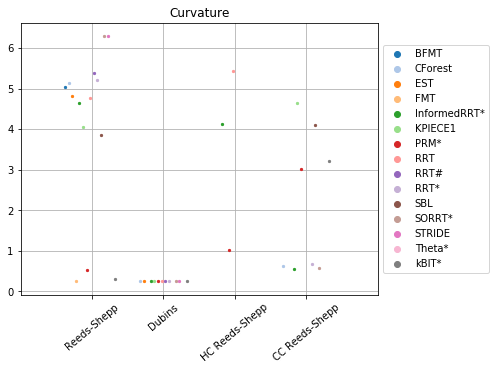

In [42]:
%reload_ext autoreload
scenario = '../results/warehouse.json'
metric = 'curvature'
steer_funcs = [
    'reeds_shepp',
    'dubins',
#     'posq',
#     'clothoid',
#     'linear',
#     'cc_dubins',
    'hc_reeds_shepp',
    'cc_reeds_shepp'
]
ignored_planners = [
    'SBPL', 'SST'
]
expected_number_of_planners = 15
found_planners = []
stats_by_steering = retrieve_planner_stats_by_steering(scenario, steer_funcs=','.join(steer_funcs))
sf_counter = 0
plt.figure(figsize=(8, 5))
for si, (sf, steering) in enumerate(stats_by_steering.items()):
    for planner, stats in steering.items():
        if planner in ignored_planners:
            continue
        if planner not in found_planners:
            found_planners.append(planner)
        pi = found_planners.index(planner)
        values = [v[metric] for v in stats.values() if v["exact_goal_path"]]
        xs = np.ones(len(values)) * (0.5 + sf_counter + (pi - expected_number_of_planners / 2) / 20)
        if sf_counter == 0:
            plt.scatter([], [], color=get_color(pi, num_colors=20), label=convert_planner_name(planner))
        plt.scatter(xs, values, color=get_color(pi, num_colors=20), s=5)
    sf_counter += 1

xs = 0.5 + np.arange(len(steer_funcs))
xlabels = [steer_function_names[s] for s in steer_funcs]
plt.xticks(xs, xlabels, rotation=40)
plt.gca().set_axisbelow(True)
plt.grid()
plt.gca().set_xlim([-0.5, len(steer_funcs) + 0.5])
plt.title(stat_names[metric]);

# Shrink current axis by 20%
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig('curvature_warehouse.png', dpi=300, bbox_inches='tight')

## Stats over different runs with one steer function

In [59]:
%reload_ext autoreload
scenario_parameters = [2, 3, 4, 5, 6]
scenarios = ['../results/turning_radius%i.000000' % v for v in scenario_parameters]
metric = 'curvature'
steer_func = 'reeds_shepp'
ignored_planners = [
    'SBPL', 'SST'
]
expected_number_of_planners = 15
found_planners = []
plt.figure(figsize=(8, 5))

ys = {}

for si, (scenario_parameter, scenario) in enumerate(zip(scenario_parameters, scenarios)):
    stats_by_steering = retrieve_planner_stats_by_steering(scenario, steer_funcs=steer_func)
    steering = list(stats_by_steering.values())[0]
#     print(steering)
    for planner, stats in steering.items():
        if planner in ignored_planners:
            continue
        if planner not in found_planners:
            ys[planner] = {}
            found_planners.append(planner)
        if scenario_parameter not in ys[planner]:
            ys[planner][scenario_parameter] = []
        ys[planner][scenario_parameter] += [v[metric] for v in stats.values() if v["exact_goal_path"]]

plt.gca().set_axisbelow(True)
plt.grid()

print(found_planners)

def clean_mean(vs):
    if None in vs:
        return None
    return np.mean(vs)
# print(ys)

means = []
stds = []
for pi, planner in enumerate(found_planners):
#     print(ys[planner])
    means = [clean_mean(vs) for vs in ys[planner].values()]
    plt.plot(scenario_parameters, means, '*-', color=get_color(pi, num_colors=20), label=convert_planner_name(planner))
# plt.gca().set_xlim([-0.5, len(steer_funcs) + 0.5])
plt.title(stat_names[metric]);

# Shrink current axis by 20%
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel('Turning Radius')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig('turning_radii_%s.png' % metric, dpi=300, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../results/turning_radius2.000000'

<Figure size 576x360 with 0 Axes>

In [52]:
cross_name = "corridor_radii"
cross_title = "Corridor Radius"
parameters = [3, 4, 5, 6, 7, 8]
parameter_labels = parameters

def setup(m: MPB, parameter: float):
    m.set_corridor_grid_env(100, 100, branches=100, radius=parameter)
    m.set_steer_functions(['reeds_shepp'])

In [42]:
cross_name = "turn_radius"
cross_title = "Turning Radius"
parameters = [2, 3, 4, 5, 6]
parameter_labels = parameters

def setup(m: MPB, parameter: float):
    m.set_corridor_grid_env(100, 100, branches=100, radius=5)
    m["steer.car_turning_radius"] = parameter
    m.set_steer_functions(['reeds_shepp'])

In [63]:
cross_name = "density"
cross_title = "Obstacle density"
parameters = [0.01, 0.015, 0.02, 0.025, 0.03]
parameter_labels = ["%g %%" % (p * 100) for p in parameters]

def setup(m: MPB, parameter: float):
    m.set_random_grid_env(100, 100, obstacle_ratio=parameter)
    m.set_steer_functions(['reeds_shepp'])

Available memory: 240.37 GB, limiting each MPB process to 6.9% usage (16.69 GB).
Creating pool of 5 processes.
Created MPB from config cross_density/cross_density_0_config.json.
Created MPB from config cross_density/cross_density_3_config.json.
Created MPB from config cross_density/cross_density_4_config.json.
Created MPB from config cross_density/cross_density_1_config.json.
Created MPB from config cross_density/cross_density_2_config.json.
Running MPB with ID cross_density_0 (log file at cross_density/cross_density_0.log)...
Running MPB with ID cross_density_4 (log file at cross_density/cross_density_4.log)...
Running MPB with ID cross_density_3 (log file at cross_density/cross_density_3.log)...
Running MPB with ID cross_density_2 (log file at cross_density/cross_density_2.log)...
Running MPB with ID cross_density_1 (log file at cross_density/cross_density_1.log)...



Benchmark 4 (cross_density_4) finished successfully.

Benchmark 2 (cross_density_2) finished successfully.

Benchmark 1 (cross_density_1) finished successfully.

Benchmark 3 (cross_density_3) finished successfully.

Benchmark 0 (cross_density_0) finished successfully.
All benchmarks succeeded.


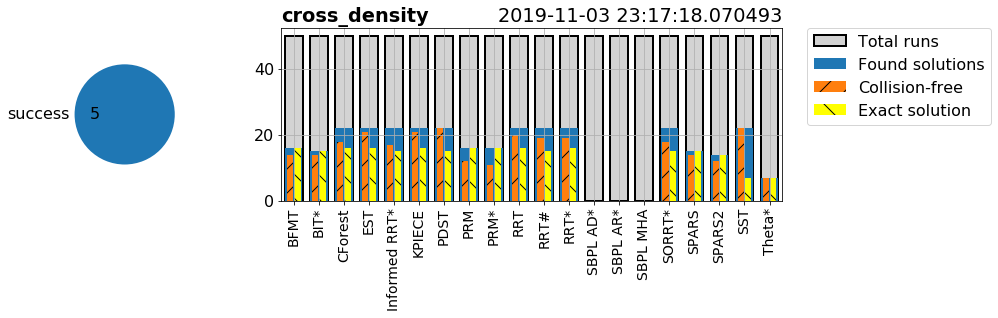

In [64]:
pool = MultipleMPB()
for param in parameters:
    m = MPB()   
    setup(m, param)
    pool.benchmarks.append(m)
run_result = pool.run_parallel("cross_" + cross_name, runs=10, processes=40, limit_memory=True)

In [65]:
for m in pool.benchmarks:
    m.visualize_trajectory_grid(save_file="cross_%s_traj_%s.pdf" % (cross_name, m.id), headless=True)
    plt.close()

Visualizing cross_density/cross_density_0_results.json
Planner BFMT found no solution!
Planner kBITstar found no solution!
Planner PRM found no solution!
Planner PRMstar found no solution!
Planner SBPL_ADstar found no solution!
Planner SBPL_ARstar found no solution!
Planner SBPL_MHA found no solution!
Planner SPARS found no solution!
Planner SPARStwo found no solution!
Planner Theta* found no solution!
Planner SBPL_ADstar found no solution!
Planner SBPL_ARstar found no solution!
Planner SBPL_MHA found no solution!
Planner Theta* found no solution!
Planner BFMT found no solution!
Planner kBITstar found no solution!
Planner CForest found no solution!
Planner EST found no solution!
Planner InformedRRTstar found no solution!
Planner KPIECE1 found no solution!
Planner PDST found no solution!
Planner PRM found no solution!
Planner PRMstar found no solution!
Planner RRT found no solution!
Planner RRT# found no solution!
Planner RRTstar found no solution!
Planner SBPL_ADstar found no solution!

{'SORRTstar': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [2], 0.03: [2]}, 'SBPL_ARstar': {0.01: [0], 0.015: [0], 0.02: [0], 0.025: [0], 0.03: [0]}, 'SPARStwo': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [3], 0.03: [0]}, 'SBPL_ADstar': {0.01: [0], 0.015: [0], 0.02: [0], 0.025: [0], 0.03: [0]}, 'SBPL_MHA': {0.01: [0], 0.015: [0], 0.02: [0], 0.025: [0], 0.03: [0]}, 'PRM': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [3], 0.03: [2]}, 'RRT#': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [2], 0.03: [2]}, 'CForest': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [3], 0.03: [2]}, 'EST': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [3], 0.03: [2]}, 'RRT': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [3], 0.03: [2]}, 'InformedRRTstar': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [2], 0.03: [2]}, 'BFMT': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [3], 0.03: [2]}, 'SPARS': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [3], 0.03: [1]}, 'RRTstar': {0.01: [4], 0.015: [4], 0.02: [3], 0.025: [3], 0.03: [2]}, 'kBITstar': {0.01: 

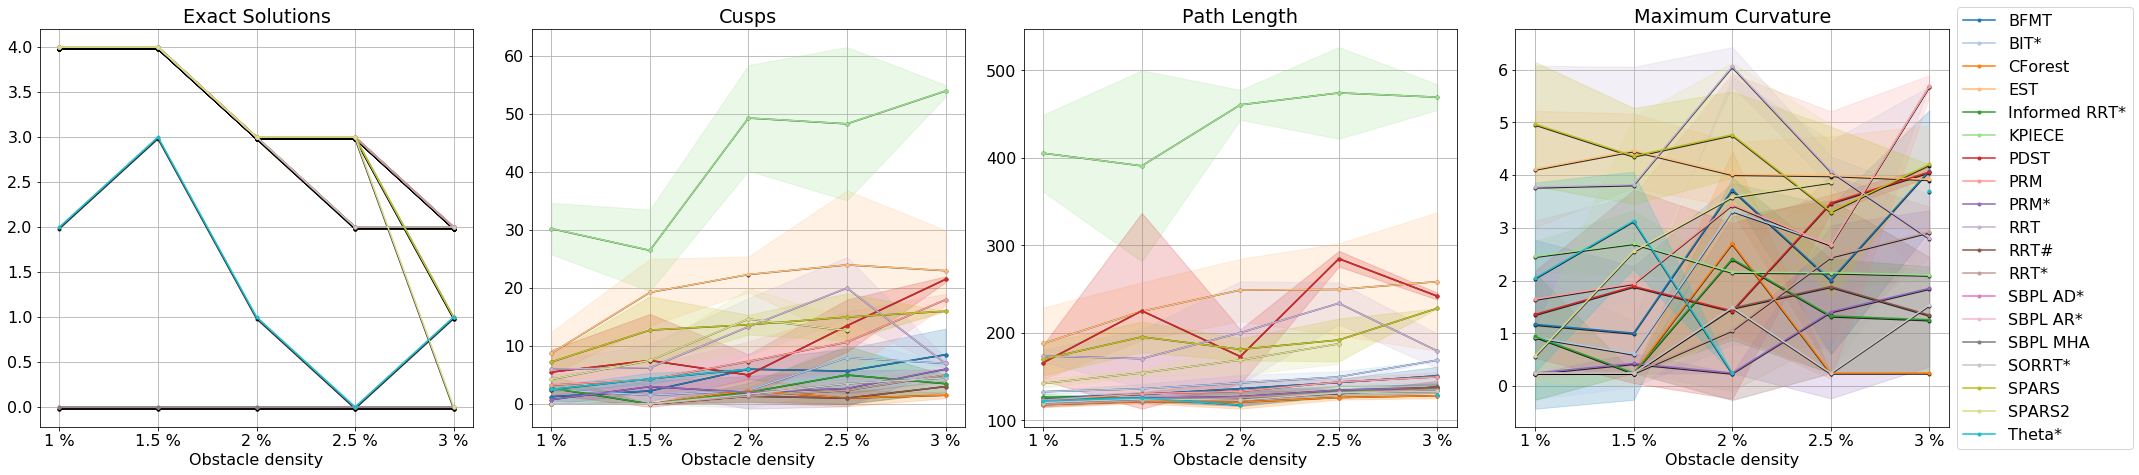

In [69]:
%reload_ext autoreload

ignored_planners = [
    'SBPL', 'SST'
]

expected_number_of_planners = 15

import matplotlib
matplotlib.rcParams.update({'font.size': 16})


def plot_scenario_parameters(metric: str):
    ys = {}
    found_planners = []
    for i, scenario_parameter in enumerate(parameters):
        scenario = pool.benchmarks[i].results_filename
        stats_by_steering = retrieve_planner_stats_by_steering(scenario, steer_funcs='reeds_shepp')
        steering = list(stats_by_steering.values())[0]
    #     print(steering)
        for planner, stats in steering.items():
            if planner in ignored_planners:
                continue
            if planner not in found_planners:
                ys[planner] = {}
                found_planners.append(planner)
            if scenario_parameter not in ys[planner]:
                ys[planner][scenario_parameter] = []
            if metric == "cusps":
                ys[planner][scenario_parameter] += [len(v[metric]) for v in stats.values() if v["exact_goal_path"] and v["path_found"]]
            elif metric == "exact_solutions":
                ys[planner][scenario_parameter] += [sum([1 for v in stats.values() if v["exact_goal_path"] and v["path_found"]])]
            else:
                ys[planner][scenario_parameter] += [v[metric] for v in stats.values() if v["exact_goal_path"] and v["path_found"]]

    plt.gca().set_axisbelow(True)
    plt.grid()
    
    if metric == "exact_solutions":
        print(ys)

    print(found_planners)

    means = []
    stds = []
    for pi, planner in enumerate(sorted(found_planners, key=convert_planner_name)):
        if len(ys[planner].values()) == 0:
            print("No results for planner", convert_planner_name(planner))
            continue

        means, stds = [], []
        for scenario_parameter in parameters:
            if scenario_parameter not in ys[planner]:
                means.append(np.nan)
                stds.append(np.nan)
                continue
            means.append(safe_mean(ys[planner][scenario_parameter]))
            stds.append(safe_std(ys[planner][scenario_parameter]))

        means = np.array(means)
        stds = np.array(stds)
        plt.fill_between(parameters, means-stds, means+stds, alpha=0.2, color=get_color(pi, num_colors=20), zorder=2)
        # add some shadow below the plot
        plt.plot(parameters, means - 0.02, '.-', color=(0, 0, 0, .8), zorder=3)
        plt.plot(parameters, means, '.-', color=get_color(pi, num_colors=20), label=convert_planner_name(planner), zorder=4)
    # plt.gca().set_xlim([-0.5, len(steer_funcs) + 0.5])
    if metric in stat_names:
        plt.title(stat_names[metric]);
    else:
        plt.title(metric)
    
    # Shrink current axis by 20%
    ax = plt.gca()
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.set_xlabel(cross_title)
    ax.set_xticks(parameters)
    ax.set_xticklabels(parameter_labels)


plt.figure(figsize=(30, 7))
plt.subplot(1, 4, 1)
plot_scenario_parameters("exact_solutions")
plt.subplot(1, 4, 2)
plot_scenario_parameters("cusps")
plt.subplot(1, 4, 3)
plot_scenario_parameters("path_length")
plt.subplot(1, 4, 4)
plot_scenario_parameters("curvature")

# Put a legend to the right of the current axis
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('cross_%s.png' % cross_name, dpi=300, bbox_inches='tight')
plt.savefig('cross_%s.pdf' % cross_name, dpi=300, bbox_inches='tight')